# Interindividual difference in learning act or avoid Analysis

# Table of content
* [Install packages](#install)
* [Preparing Data](#Data_prepare)
* [First Hyphothesis](#first_hyp)
    * [No Go to Win Conditions](#Nogo2win)
    * [No Go to Avoid Punishment Conditions](#Nogo2avoid)
    * [First and second session compare](#first_second_compare)
    * [NoGo to Win and NoGo to avoid punishment relationship](#rel_nogo)
    * --

* [Second Hypothesis](#second_hyp)
    * [EDE index vs. Nogo2win](#EDE_nogo2win)
        * [EDE index vs. mean of Nogo2win](#EDE_mean_nogo2win)
        * [EDE index vs. first session Nogo2win](#EDE_first_nogo2win)
        * [EDE index vs. first session Go2win - Nogo2win](#EDE_first_rel_nogo2win)
        * [EDE index vs. second session NoGo2win](#EDE_second_nogo2win)

    * [EDE index vs. Nogo2AvoidPun](#EDE_nogo2avoid)

        

<a id="install"></a>
# Install Packages

In [88]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 150)
import seaborn as sns
sns.set_theme(color_codes=True)
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import json

In [89]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

<a id="Data_prepare"></a>
# Preparing Data

In [90]:
first_round_perfornance = pd.read_csv('Data/first_round_final_performance.csv',index_col= 0)
# first_round_perfornance.columns = ['mturkID', 'first_go2avoidPun', 'first_go2win', 'first_nogo2avoidPun', 'first_nogo2win']
second_round_perfornance = pd.read_csv('Data/second_round_final_performance.csv',index_col= 0)
# second_round_perfornance.columns = ['mturkID', 'second_go2avoidPun', 'second_go2win', 'second_nogo2avoidPun', 'second_nogo2win']


In [91]:
all_performance = pd.merge(second_round_perfornance, first_round_perfornance, on = 'mturkID', how = 'left')
all_performance.gender_second_session = all_performance.gender_second_session.map({'female':'female','other':'female','male':'male'})
all_performance.gender_first_session = all_performance.gender_first_session.map({'female':'female','other':'female','male':'male'})
all_performance = all_performance.drop_duplicates()

In [92]:
all_performance['first_rel_nogo2win'] = all_performance['go2win_first_session'] - all_performance['nogo2win_first_session'] 
all_performance['second_rel_nogo2win'] = all_performance['go2win_second_session'] - all_performance['nogo2win_second_session'] 

all_performance['first_rel_nogo2avoidPun'] = all_performance['go2win_first_session'] - all_performance['nogo2avoidPun_first_session']
all_performance['second_rel_nogo2avoidPun'] = all_performance['go2win_second_session'] - all_performance['nogo2avoidPun_second_session'] 


In [93]:
Questionnare_data = pd.read_csv('Data/cleaned_questionnaire_data.csv', index_col= 0)
Questionnare_data.columns = ['mturkID', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', 'weight', 'heightfeet', 'heightinch', 'pet-1',
       'pet-type', 'pet-number', 'pet-timeperiod', 'pet-0']

Questionnare_data['has_pet'] = np.logical_not(Questionnare_data['pet-0'] == 'no') + (Questionnare_data['pet-1'] == 'yes') 

Questionnare_data['restraint'] = ((Questionnare_data['1']) + Questionnare_data['2'] + Questionnare_data['3'] + (Questionnare_data['4']) + (Questionnare_data['5']))/5
Questionnare_data['eating_concern'] = ((Questionnare_data['7']) + Questionnare_data['9'] + Questionnare_data['20'] + (Questionnare_data['19']) + (Questionnare_data['21']))/5
Questionnare_data['weight_concern'] = ((Questionnare_data['22']) + Questionnare_data['24'] + Questionnare_data['8'] + (Questionnare_data['25']) + (Questionnare_data['12']))/5
Questionnare_data['shape_concern'] = ((Questionnare_data['6']) + Questionnare_data['8'] + Questionnare_data['23'] + (Questionnare_data['10']) + (Questionnare_data['26']) \
    + Questionnare_data['27'] + Questionnare_data['28'] + Questionnare_data['11'])/8

Questionnare_data['data_quality'] = Questionnare_data['1'] + Questionnare_data['2'] + Questionnare_data['3'] + Questionnare_data['4'] + Questionnare_data['5'] + Questionnare_data['6'] + Questionnare_data['7'] + Questionnare_data['8'] + Questionnare_data['9'] + Questionnare_data['10'] + Questionnare_data['11'] + Questionnare_data['12'] + Questionnare_data['13'] + Questionnare_data['14'] + Questionnare_data['15'] + Questionnare_data['16'] + Questionnare_data['17'] + Questionnare_data['18'] + Questionnare_data['19'] + Questionnare_data['20'] + Questionnare_data['21'] + Questionnare_data['22'] + Questionnare_data['23'] + Questionnare_data['24'] + Questionnare_data['25'] + Questionnare_data['26'] + Questionnare_data['27'] + Questionnare_data['28'] 

Questionnare_data['global_score'] = (Questionnare_data['restraint'] + Questionnare_data['eating_concern'] + Questionnare_data['weight_concern'] + Questionnare_data['shape_concern'])/4

Questionnare_data['height_m'] = Questionnare_data['heightfeet'] * 0.3048 + Questionnare_data['heightinch'] * 0.0254 
Questionnare_data['weight_kg'] = Questionnare_data['weight']*0.453592
Questionnare_data['BMI'] = Questionnare_data['weight_kg']/Questionnare_data['height_m']**2

perf_questionnaire_data = pd.merge(Questionnare_data, all_performance, on='mturkID' )
perf_questionnaire_data['nogo2win_mean_performance'] = (perf_questionnaire_data['nogo2win_first_session'] + perf_questionnaire_data['nogo2win_second_session'])/2



perf_questionnaire_data["pet-type"] = perf_questionnaire_data["pet-type"].map(lambda x: x if type(x)!=str else x.lower())

<a id="first_hyp"></a>
# First Hypothesis
1. Our first hypothesis is that Pavlovian bias in learning is a stable, trait-like characteristic of human agents. 

<a id="Nogo2win"></a>
## No Go to Win Conditions

### Absolute performance

In [94]:
test_res = stats.pearsonr(all_performance.nogo2win_first_session, all_performance.nogo2win_second_session)
print('correlation between relative first and second round: ', test_res[0])
print('p-value: ', test_res[1])


correlation between relative first and second round:  0.3765645776592518
p-value:  0.015236990672853798


<AxesSubplot:xlabel='nogo2win_first_session', ylabel='nogo2win_second_session'>

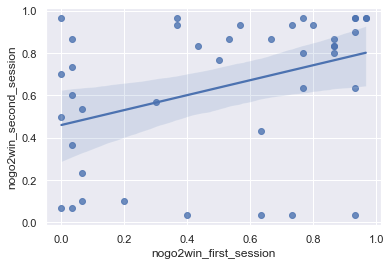

In [95]:
sns.regplot(x = all_performance.nogo2win_first_session, y = all_performance.nogo2win_second_session)

In [96]:
smf.ols(formula = 'nogo2win_second_session ~ nogo2win_first_session', data = all_performance).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     nogo2win_second_session   R-squared:                       0.142
Model:                                 OLS   Adj. R-squared:                  0.120
Method:                      Least Squares   F-statistic:                     6.444
Date:                     Tue, 21 Dec 2021   Prob (F-statistic):             0.0152
Time:                             15:19:28   Log-Likelihood:                -10.150
No. Observations:                       41   AIC:                             24.30
Df Residuals:                           39   BIC:                             27.73
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.4601      0.086      5.369      0.000       0.287       0.633
nogo2win_first_session     0.3529      0.139      2.539      0.015       0.072       0.634
==============================================================================
Omnibus:                        5.858   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                5.478
Skew:                          -0.894   Prob(JB):                       0.0647
Kurtosis:                       2.909   Cond. No.                         3.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Relative performace 

In [97]:
test_res = stats.pearsonr(all_performance.first_rel_nogo2win, all_performance.second_rel_nogo2win)
print('correlation between first and second round actual performance: ', test_res[0])
print('p-value: ', test_res[1])

correlation between first and second round actual performance:  0.3257279745282606
p-value:  0.037688065963665744


<AxesSubplot:xlabel='first_rel_nogo2win', ylabel='second_rel_nogo2win'>

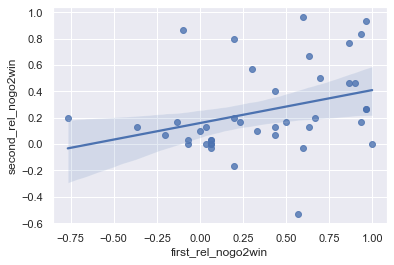

In [47]:
sns.regplot(x = all_performance.first_rel_nogo2win, y = all_performance.second_rel_nogo2win)

In [48]:
huber_t = sm.RLM(all_performance.first_rel_nogo2win, sm.add_constant(all_performance.second_rel_nogo2win), M=sm.robust.norms.HuberT())
hub_results = huber_t.fit()
print(
    hub_results.summary(
        yname="y", xname=["var_%d" % i for i in range(len(hub_results.params))]
    )
)

                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                   41
Model:                            RLM   Df Residuals:                       39
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 21 Dec 2021                                         
Time:                        14:55:26                                         
No. Iterations:                    16                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
var_0          0.2639      0.086      3.061      0.0

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<a id="Nogo2avoid"></a>
## No Go to Avoid Punishment Conditions

### Absolute performance

<AxesSubplot:xlabel='nogo2avoidPun_first_session', ylabel='nogo2avoidPun_second_session'>

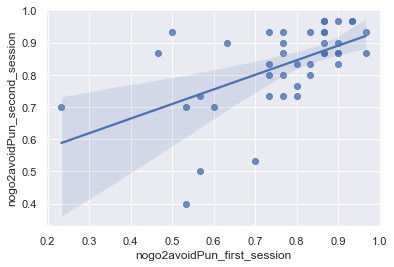

In [49]:
sns.regplot(x = all_performance.nogo2avoidPun_first_session, y = all_performance.nogo2avoidPun_second_session)

In [50]:
smf.ols(formula = 'nogo2avoidPun_first_session ~ nogo2avoidPun_second_session', data = all_performance).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     nogo2avoidPun_first_session   R-squared:                       0.305
Model:                                     OLS   Adj. R-squared:                  0.287
Method:                          Least Squares   F-statistic:                     17.09
Date:                         Tue, 21 Dec 2021   Prob (F-statistic):           0.000183
Time:                                 14:55:26   Log-Likelihood:                 25.404
No. Observations:                           41   AIC:                            -46.81
Df Residuals:                               39   BIC:                            -43.38
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.2074      0.136      1.520      0.137      -0.069       0.483
nogo2avoidPun_second_session     0.6724      0.163      4.134      0.000       0.343       1.001
==============================================================================
Omnibus:                       22.201   Durbin-Watson:                   2.380
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.742
Skew:                          -1.677   Prob(JB):                     1.28e-07
Kurtosis:                       5.708   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Relative performance

<AxesSubplot:xlabel='first_rel_nogo2avoidPun', ylabel='second_rel_nogo2avoidPun'>

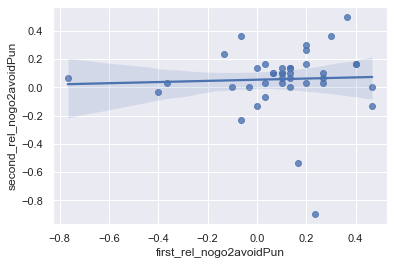

In [51]:
sns.regplot(x = all_performance.first_rel_nogo2avoidPun, y = all_performance.second_rel_nogo2avoidPun)

In [52]:
smf.ols(formula = 'first_rel_nogo2avoidPun ~ second_rel_nogo2avoidPun', data = all_performance).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     first_rel_nogo2avoidPun   R-squared:                       0.002
Model:                                 OLS   Adj. R-squared:                 -0.024
Method:                      Least Squares   F-statistic:                   0.06844
Date:                     Tue, 21 Dec 2021   Prob (F-statistic):              0.795
Time:                             14:55:26   Log-Likelihood:                 2.4468
No. Observations:                       41   AIC:                           -0.8936
Df Residuals:                           39   BIC:                             2.534
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.0951      0.038      2.524      0.016       0.019       0.171
second_rel_nogo2avoidPun     0.0425      0.162      0.262      0.795      -0.286       0.371
==============================================================================
Omnibus:                       21.504   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.662
Skew:                          -1.433   Prob(JB):                     1.09e-08
Kurtosis:                       6.640   Cond. No.                         4.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id="first_second_compare"></a>
## First and Second session differences in performance

In [100]:
performance_difference = all_performance[['go2avoidPun_second_session', 'go2win_second_session','nogo2avoidPun_second_session', 'nogo2win_second_session','go2avoidPun_first_session', 'go2win_first_session',
       'nogo2avoidPun_first_session', 'nogo2win_first_session']].melt()

def extract_condition(x):
    if('nogo2avoidPun' in x):
        return 'nogo2avoidPun'
    elif('nogo2win' in x):
        return 'nogo2win'
    elif( 'go2avoidPun' in x):
        return 'go2avoidPun'
    elif( 'go2win' in x):
        return 'go2win'
    else:
        return 'error'

def extract_session(x):
    if('first' in x):
        return 'first'
    elif('second' in x):
        return 'second'
    else:
        return 'error'

performance_difference['condition'] = performance_difference.variable.apply(lambda x: extract_condition(x))

performance_difference['session'] = performance_difference.variable.apply(lambda x: extract_session(x))


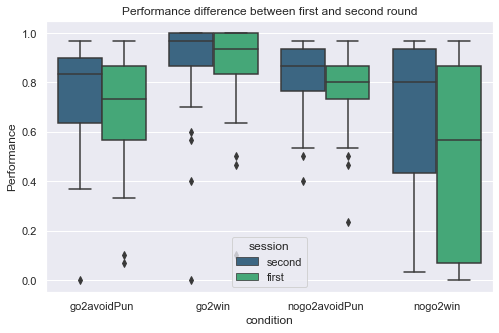

In [101]:
plt.figure(figsize=(8,5))
# sns.swarmplot(x = 'condition', y = 'value', hue = 'session', dodge=True, palette='viridis', data = performance_difference)
sns.boxplot(x = 'condition', y = 'value', hue = 'session',  palette='viridis', data = performance_difference)
plt.title('Performance difference between first and second round')
plt.ylabel('Performance')
plt.show()

<a id="rel_nogo"></a>
## NoGo to Win and NoGo to avoid punishment relationship

<AxesSubplot:xlabel='nogo2win_first_session', ylabel='nogo2avoidPun_first_session'>

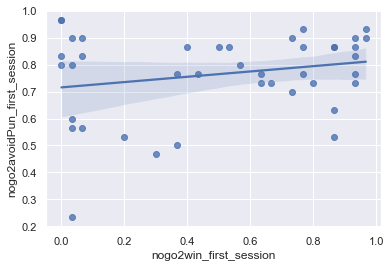

In [102]:
sns.regplot(x = all_performance.nogo2win_first_session, y = all_performance.nogo2avoidPun_first_session)

In [56]:
np.cov(all_performance.nogo2avoidPun_first_session,all_performance.nogo2win_first_session)

array([[0.02499729, 0.01286518],
       [0.01286518, 0.13063279]])

In [57]:
smf.ols(formula = 'nogo2avoidPun_first_session ~ nogo2win_first_session', data = all_performance).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     nogo2avoidPun_first_session   R-squared:                       0.051
Model:                                     OLS   Adj. R-squared:                  0.026
Method:                          Least Squares   F-statistic:                     2.082
Date:                         Tue, 21 Dec 2021   Prob (F-statistic):              0.157
Time:                                 14:55:27   Log-Likelihood:                 19.020
No. Observations:                           41   AIC:                            -34.04
Df Residuals:                               39   BIC:                            -30.61
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.7156      0.042     17.011      0.000       0.630       0.801
nogo2win_first_session     0.0985      0.068      1.443      0.157      -0.040       0.237
==============================================================================
Omnibus:                        8.579   Durbin-Watson:                   2.255
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                7.453
Skew:                          -0.934   Prob(JB):                       0.0241
Kurtosis:                       3.933   Cond. No.                         3.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id="second_hyp"></a>
# Second Hypothesis

Uncomment below to exclude who responded the same for all questions

In [103]:
# perf_questionnaire_data = perf_questionnaire_data[(perf_questionnaire_data['data_quality'] != 0)]

<a id="EDE_nogo2win"></a>
# Eating Disorder Index Vs. nogo2win Performance

<a id="EDE_mean_nogo2win"></a>
### EDE index vs. Average of performance of 2 sessions of NoGo2Win

<AxesSubplot:xlabel='global_score', ylabel='nogo2win_mean_performance'>

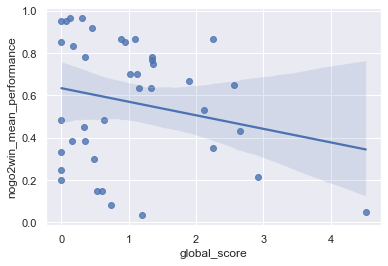

In [104]:
sns.regplot(data = perf_questionnaire_data, x = 'global_score', y = 'nogo2win_mean_performance' )

In [105]:
test_res = stats.pearsonr(perf_questionnaire_data.global_score, perf_questionnaire_data.nogo2win_mean_performance)
print('correlation between eating disorder index and  ', test_res[0])
print('p-value: ', test_res[1])


correlation between eating disorder index and   -0.2216234763510661
p-value:  0.17511841790158691


### OLS regression

In [106]:
smf.ols(formula = 'nogo2win_mean_performance ~ global_score', data = perf_questionnaire_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     nogo2win_mean_performance   R-squared:                       0.049
Model:                                   OLS   Adj. R-squared:                  0.023
Method:                        Least Squares   F-statistic:                     1.911
Date:                       Tue, 21 Dec 2021   Prob (F-statistic):              0.175
Time:                               15:20:00   Log-Likelihood:                -5.8537
No. Observations:                         39   AIC:                             15.71
Df Residuals:                             37   BIC:                             19.03
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6340      0.066      9.663      0.000       0.501       0.767
global_score    -0.0640      0.046     -1.382      0.175      -0.158       0.030
==============================================================================
Omnibus:                       10.924   Durbin-Watson:                   2.194
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                3.559
Skew:                          -0.398   Prob(JB):                        0.169
Kurtosis:                       1.752   Cond. No.                         2.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Multi-level regression

In [107]:
perf_questionnaire_data.gender_first_session.value_counts()

male      24
female    15
Name: gender_first_session, dtype: int64

In [63]:
model = smf.mixedlm("nogo2win_mean_performance ~  global_score ",
                    perf_questionnaire_data, re_formula='1',
                    groups= "gender_first_session" ).fit()

model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Mixed Linear Model Regression Results
=======================================================================
Model:            MixedLM Dependent Variable: nogo2win_mean_performance
No. Observations: 38      Method:             REML                     
No. Groups:       2       Scale:              0.0831                   
Min. group size:  15      Likelihood:         -9.9937                  
Max. group size:  23      Converged:          Yes                      
Mean group size:  19.0                                                 
-----------------------------------------------------------------------
                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Intercept                     0.625    0.070  8.898 0.000  0.487  0.763
global_score                 -0.063    0.046 -1.364 0.173 -0.154  0.028
gender_first_session Var      0.000    0.043                           
=======================================================================

"""

In [108]:
md = smf.mixedlm(formula = 'nogo2win_mean_performance ~ global_score', data = perf_questionnaire_data, groups = perf_questionnaire_data.BMI)
mdf = md.fit()
print(mdf.summary())

                 Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: nogo2win_mean_performance
No. Observations: 39      Method:             REML                     
No. Groups:       39      Scale:              0.0417                   
Min. group size:  1       Likelihood:         -10.1893                 
Max. group size:  1       Converged:          Yes                      
Mean group size:  1.0                                                  
--------------------------------------------------------------------------
                 Coef.     Std.Err.      z       P>|z|    [0.025    0.975]
--------------------------------------------------------------------------
Intercept         0.634       0.066     9.663    0.000     0.505     0.763
global_score     -0.064       0.046    -1.382    0.167    -0.155     0.027
Group Var         0.042                                                   



/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


<a id="EDE_first_nogo2win"></a>

### First performance of NoGo2Win Vs. global score

* Please note that an individual in our data has participated in the first and third round but no second. and his data has effects on the p-value.

In [109]:
perf_questionnaire_data_for_first_round = pd.merge(Questionnare_data, first_round_perfornance, on='mturkID' )
perf_questionnaire_data_for_first_round = perf_questionnaire_data_for_first_round.drop_duplicates(subset = 'mturkID')
# perf_questionnaire_data_for_first_round = perf_questionnaire_data_for_first_round[perf_questionnaire_data_for_first_round.mturkID != 'A1PAY3X73PQ16S']
# perf_questionnaire_data_for_first_round = perf_questionnaire_data_for_first_round[(perf_questionnaire_data_for_first_round['data_quality'] != 0)]

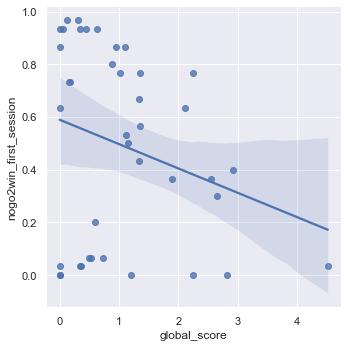

In [110]:
sns.lmplot(data = perf_questionnaire_data_for_first_round, x = 'global_score', y = 'nogo2win_first_session' )

In [82]:
smf.ols(formula = 'nogo2win_first_session ~ global_score', data = perf_questionnaire_data_for_first_round).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     nogo2win_first_session   R-squared:                       0.070
Model:                                OLS   Adj. R-squared:                  0.044
Method:                     Least Squares   F-statistic:                     2.768
Date:                    Tue, 21 Dec 2021   Prob (F-statistic):              0.105
Time:                            15:07:21   Log-Likelihood:                -13.970
No. Observations:                      39   AIC:                             31.94
Df Residuals:                          37   BIC:                             35.27
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.5809      0.081      7.157      0.000       0.416       0.745
global_score    -0.0912      0.055     -1.664      0.105      -0.202       0.020
==============================================================================
Omnibus:                       14.072   Durbin-Watson:                   2.545
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                3.935
Skew:                          -0.412   Prob(JB):                        0.140
Kurtosis:                       1.680   Cond. No.                         2.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
perf_questionnaire_data_for_first_round.gender_first_session.value_counts()

male      24
female    15
other      1
Name: gender_first_session, dtype: int64

#### Baseline

In [114]:
model = smf.mixedlm("nogo2win_first_session ~  1 + global_score",
                    perf_questionnaire_data_for_first_round, re_formula='1',
                    groups= "gender_first_session" ).fit()

model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Mixed Linear Model Regression Results
====================================================================
Model:            MixedLM Dependent Variable: nogo2win_first_session
No. Observations: 40      Method:             REML                  
No. Groups:       3       Scale:              0.1253                
Min. group size:  1       Likelihood:         -18.1746              
Max. group size:  24      Converged:          Yes                   
Mean group size:  13.3                                              
--------------------------------------------------------------------
                          Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------
Intercept                  0.589    0.083  7.072 0.000  0.426  0.753
global_score              -0.092    0.055 -1.676 0.094 -0.200  0.016
gender_first_session Var   0.000    0.034                           
====================================================================

"""

In [113]:
model = smf.mixedlm("nogo2win_first_session ~  1 + global_score ",
                    perf_questionnaire_data_for_first_round[perf_questionnaire_data_for_first_round.gender_first_session != 'other'],
                    re_formula='1',
                    groups= "gender_first_session" ).fit()

model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Mixed Linear Model Regression Results
====================================================================
Model:            MixedLM Dependent Variable: nogo2win_first_session
No. Observations: 39      Method:             REML                  
No. Groups:       2       Scale:              0.1279                
Min. group size:  15      Likelihood:         -18.1604              
Max. group size:  24      Converged:          Yes                   
Mean group size:  19.5                                              
--------------------------------------------------------------------
                          Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------
Intercept                  0.582    0.088  6.604 0.000  0.409  0.754
global_score              -0.089    0.056 -1.581 0.114 -0.199  0.021
gender_first_session Var   0.000    0.033                           
====================================================================

"""

<a id="EDE_first_rel_nogo2win"></a>
### First session performance of (Go2Win - NoGo2Win) Vs. global score

Text(0, 0.5, '(GW - NGW) performance')

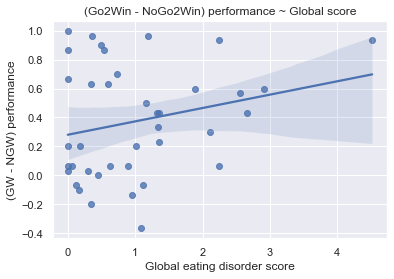

In [115]:
plt.figure()

sns.regplot(data = perf_questionnaire_data, x = 'global_score', y = 'first_rel_nogo2win' )
plt.title('(Go2Win - NoGo2Win) performance ~ Global score')

plt.xlabel('Global eating disorder score')
plt.ylabel('(GW - NGW) performance')



In [116]:
smf.ols(formula = 'first_rel_nogo2win ~ global_score', data = perf_questionnaire_data ).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     first_rel_nogo2win   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     2.294
Date:                Tue, 21 Dec 2021   Prob (F-statistic):              0.138
Time:                        15:21:00   Log-Likelihood:                -16.613
No. Observations:                  39   AIC:                             37.23
Df Residuals:                      37   BIC:                             40.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.2806      0.086      3.245      0.002       0.105       0.456
global_score     0.0924      0.061      1.515      0.138      -0.031       0.216
==============================================================================
Omnibus:                        2.665   Durbin-Watson:                   2.174
Prob(Omnibus):                  0.264   Jarque-Bera (JB):                1.705
Skew:                           0.275   Prob(JB):                        0.426
Kurtosis:                       2.136   Cond. No.                         2.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
md = smf.mixedlm(formula = 'first_rel_nogo2win ~ global_score', data = perf_questionnaire_data.drop(15), groups = perf_questionnaire_data.drop(15).BMI)
mdf = md.fit()
print(mdf.summary())

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: first_rel_nogo2win
No. Observations: 31      Method:             REML              
No. Groups:       31      Scale:              0.0663            
Min. group size:  1       Likelihood:         -15.2872          
Max. group size:  1       Converged:          Yes               
Mean group size:  1.0                                           
------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept       0.225      0.045   4.954   0.000    0.136    0.314
global_score    0.129      0.015   8.556   0.000    0.100    0.159
Group Var       0.066                                             



/opt/homebrew/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2115: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


<a id="EDE_second_nogo2win"></a>
### Second session performance of NoGo2Win Vs. global score

Text(0, 0.5, ' 2nd (NGW) performance')

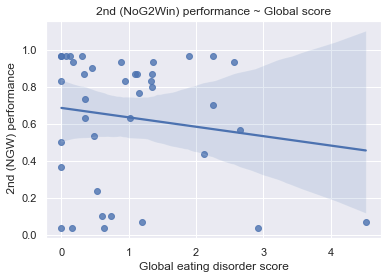

In [154]:
plt.figure()

sns.regplot(data = perf_questionnaire_data, x = 'global_score', y = 'nogo2win_second_session' )
plt.title('2nd (NoG2Win) performance ~ Global score')

plt.xlabel('Global eating disorder score')
plt.ylabel(' 2nd (NGW) performance')



In [155]:
smf.ols(formula = 'nogo2win_second_session ~ global_score', data = perf_questionnaire_data ).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     nogo2win_second_session   R-squared:                       0.022
Model:                                 OLS   Adj. R-squared:                 -0.004
Method:                      Least Squares   F-statistic:                    0.8374
Date:                     Tue, 21 Dec 2021   Prob (F-statistic):              0.366
Time:                             15:44:57   Log-Likelihood:                -13.055
No. Observations:                       39   AIC:                             30.11
Df Residuals:                           37   BIC:                             33.44
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6854      0.079      8.685      0.000       0.526       0.845
global_score    -0.0510      0.056     -0.915      0.366      -0.164       0.062
==============================================================================
Omnibus:                        6.906   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                5.129
Skew:                          -0.757   Prob(JB):                       0.0769
Kurtosis:                       2.070   Cond. No.                         2.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id="EDE_nogo2avoid"></a>
# Nogo2AvoidPun and Food disorder index

<a id="EDE_first_nogo2avoid"></a>
### First nogo2AvoidPun vs. Food disorder index

<AxesSubplot:xlabel='global_score', ylabel='nogo2avoidPun_first_session'>

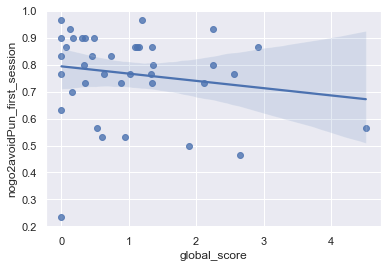

In [147]:
sns.regplot(data = perf_questionnaire_data, x = 'global_score', y = 'nogo2avoidPun_first_session' )

In [148]:
smf.ols(formula = 'nogo2avoidPun_first_session ~ global_score', data = perf_questionnaire_data ).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     nogo2avoidPun_first_session   R-squared:                       0.029
Model:                                     OLS   Adj. R-squared:                  0.003
Method:                          Least Squares   F-statistic:                     1.119
Date:                         Tue, 21 Dec 2021   Prob (F-statistic):              0.297
Time:                                 15:36:56   Log-Likelihood:                 17.433
No. Observations:                           39   AIC:                            -30.87
Df Residuals:                               37   BIC:                            -27.54
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.7938      0.036     21.979      0.000       0.721       0.867
global_score    -0.0270      0.025     -1.058      0.297      -0.079       0.025
==============================================================================
Omnibus:                       18.308   Durbin-Watson:                   2.313
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.576
Skew:                          -1.446   Prob(JB):                     7.60e-06
Kurtosis:                       5.478   Cond. No.                         2.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Gender Analysis

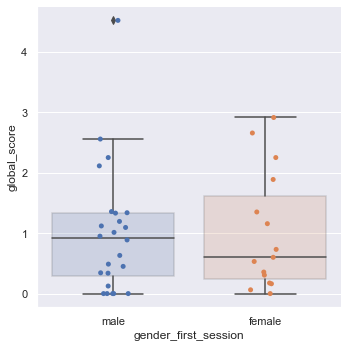

In [119]:
ax = sns.catplot(x = 'gender_first_session', y = 'global_score', data = perf_questionnaire_data)
ax = sns.boxplot(x = 'gender_first_session', y = 'global_score',boxprops=dict(alpha=.2), data = perf_questionnaire_data)

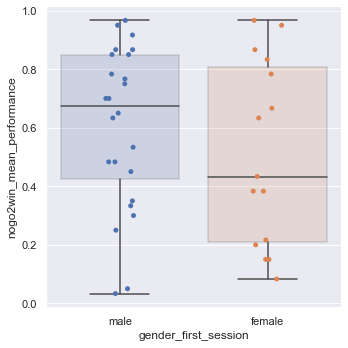

In [149]:
ax = sns.catplot(x = 'gender_first_session', y = 'nogo2win_mean_performance', data = perf_questionnaire_data)
ax = sns.boxplot(x = 'gender_first_session', y = 'nogo2win_mean_performance',boxprops=dict(alpha=.2), data = perf_questionnaire_data)

<Figure size 432x288 with 0 Axes>

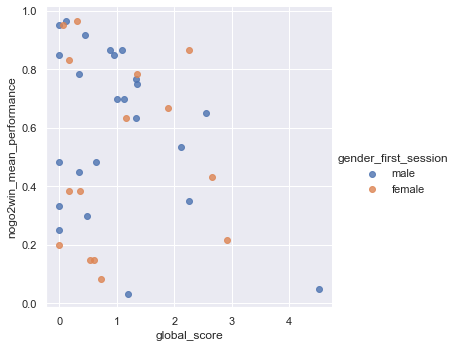

In [121]:
plt.figure()
sns.lmplot( y="nogo2win_mean_performance", x="global_score", data=perf_questionnaire_data, fit_reg=False, hue='gender_first_session', legend=True)
# plt.title

# Age Vs. NoGo2Win Performance

<Figure size 432x288 with 0 Axes>

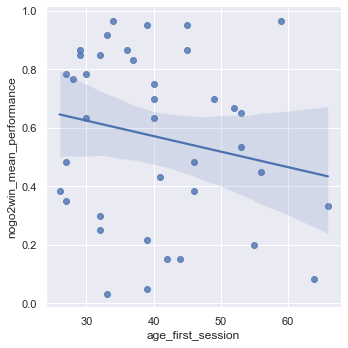

In [150]:
plt.figure()
sns.lmplot( y="nogo2win_mean_performance", x="age_first_session", data=perf_questionnaire_data,  fit_reg=True)
# plt.title

In [151]:
smf.ols(formula = 'nogo2win_mean_performance ~ age_first_session', data = perf_questionnaire_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     nogo2win_mean_performance   R-squared:                       0.038
Model:                                   OLS   Adj. R-squared:                  0.012
Method:                        Least Squares   F-statistic:                     1.474
Date:                       Tue, 21 Dec 2021   Prob (F-statistic):              0.232
Time:                               15:38:41   Log-Likelihood:                -6.0739
No. Observations:                         39   AIC:                             16.15
Df Residuals:                             37   BIC:                             19.47
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.7833      0.182      4.303      0.000       0.415       1.152
age_first_session    -0.0053      0.004     -1.214      0.232      -0.014       0.004
==============================================================================
Omnibus:                        5.049   Durbin-Watson:                   2.186
Prob(Omnibus):                  0.080   Jarque-Bera (JB):                2.360
Skew:                          -0.306   Prob(JB):                        0.307
Kurtosis:                       1.962   Cond. No.                         164.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## BMI index vs. nogo2win performance

<Figure size 432x288 with 0 Axes>

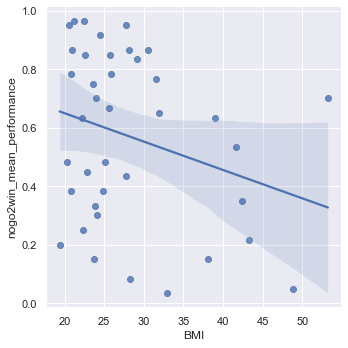

In [153]:
plt.figure()
sns.lmplot( y="nogo2win_mean_performance", x="BMI", data=perf_questionnaire_data,  fit_reg=True)
# plt.title

In [125]:
smf.ols(formula = 'nogo2win_mean_performance ~ BMI', data = perf_questionnaire_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     nogo2win_mean_performance   R-squared:                       0.077
Model:                                   OLS   Adj. R-squared:                  0.052
Method:                        Least Squares   F-statistic:                     3.082
Date:                       Tue, 21 Dec 2021   Prob (F-statistic):             0.0875
Time:                               15:21:52   Log-Likelihood:                -5.2757
No. Observations:                         39   AIC:                             14.55
Df Residuals:                             37   BIC:                             17.88
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8435      0.163      5.191      0.000       0.514       1.173
BMI           -0.0097      0.006     -1.755      0.087      -0.021       0.001
==============================================================================
Omnibus:                       12.197   Durbin-Watson:                   2.376
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                3.356
Skew:                          -0.315   Prob(JB):                        0.187
Kurtosis:                       1.709   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multiple linear regression 
* for the curiosity

In [126]:
smf.ols(formula = 'nogo2win_mean_performance ~  global_score + gender_first_session', data = perf_questionnaire_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     nogo2win_mean_performance   R-squared:                       0.073
Model:                                   OLS   Adj. R-squared:                  0.021
Method:                        Least Squares   F-statistic:                     1.413
Date:                       Tue, 21 Dec 2021   Prob (F-statistic):              0.257
Time:                               15:21:57   Log-Likelihood:                -5.3620
No. Observations:                         39   AIC:                             16.72
Df Residuals:                             36   BIC:                             21.71
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.5778      0.088      6.561      0.000       0.399       0.756
gender_first_session[T.male]     0.0912      0.095      0.959      0.344      -0.102       0.284
global_score                    -0.0639      0.046     -1.378      0.177      -0.158       0.030
==============================================================================
Omnibus:                        8.993   Durbin-Watson:                   2.236
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                2.993
Skew:                          -0.312   Prob(JB):                        0.224
Kurtosis:                       1.795   Cond. No.                         4.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Restraint Index Vs. nogo2win Performance

<AxesSubplot:xlabel='restraint', ylabel='nogo2win_mean_performance'>

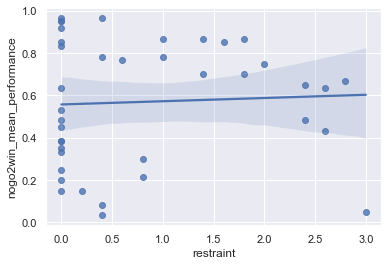

In [127]:
sns.regplot(data = perf_questionnaire_data, x = 'restraint', y = 'nogo2win_mean_performance')

In [128]:
test_res = stats.pearsonr(perf_questionnaire_data.restraint, perf_questionnaire_data.nogo2win_mean_performance)
print('correlation between eating disorder index and  ', test_res[0])
print('p-value: ', test_res[1])


correlation between eating disorder index and   0.051717500299968466
p-value:  0.7545261940890944


# Eating Concern Index Vs. nogo2win Performance

<AxesSubplot:xlabel='eating_concern', ylabel='nogo2win_mean_performance'>

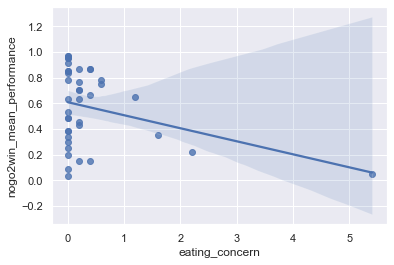

In [129]:
sns.regplot(data = perf_questionnaire_data, x = 'eating_concern', y = 'nogo2win_mean_performance')

In [130]:
smf.ols(formula = 'nogo2win_mean_performance ~ eating_concern', data = perf_questionnaire_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     nogo2win_mean_performance   R-squared:                       0.109
Model:                                   OLS   Adj. R-squared:                  0.085
Method:                        Least Squares   F-statistic:                     4.511
Date:                       Tue, 21 Dec 2021   Prob (F-statistic):             0.0404
Time:                               15:22:07   Log-Likelihood:                -4.5925
No. Observations:                         39   AIC:                             13.19
Df Residuals:                             37   BIC:                             16.51
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.6083      0.048     12.593      0.000       0.510       0.706
eating_concern    -0.1017      0.048     -2.124      0.040      -0.199      -0.005
==============================================================================
Omnibus:                        5.205   Durbin-Watson:                   2.260
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                2.834
Skew:                          -0.429   Prob(JB):                        0.242
Kurtosis:                       1.996   Cond. No.                         1.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Weight Concern Index Vs. nogo2win Performance

<AxesSubplot:xlabel='weight_concern', ylabel='nogo2win_mean_performance'>

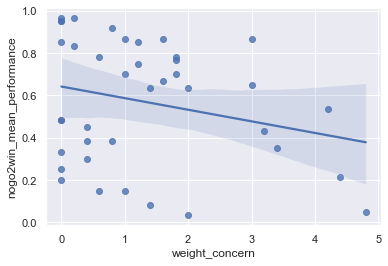

In [131]:
sns.regplot(data = perf_questionnaire_data, x = 'weight_concern', y = 'nogo2win_mean_performance')

In [132]:
test_res = stats.pearsonr(perf_questionnaire_data.weight_concern, perf_questionnaire_data.nogo2win_mean_performance)
print('correlation between eating disorder index and  ', test_res[0])
print('p-value: ', test_res[1])

correlation between eating disorder index and   -0.2506262943774218
p-value:  0.12382479736600474


# Shape Concern Index Vs. nogo2win Performance

<AxesSubplot:xlabel='shape_concern', ylabel='nogo2win_mean_performance'>

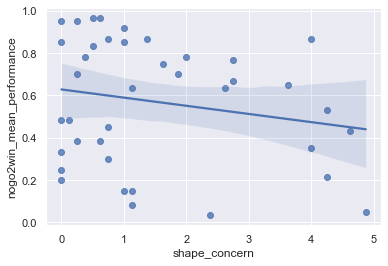

In [133]:
sns.regplot(data = perf_questionnaire_data, x = 'shape_concern', y = 'nogo2win_mean_performance')

In [134]:
test_res = stats.pearsonr(perf_questionnaire_data.shape_concern, perf_questionnaire_data.nogo2win_mean_performance)
print('correlation between eating disorder index and  ', test_res[0])
print('p-value: ', test_res[1])

correlation between eating disorder index and   -0.19929230923310248
p-value:  0.223857813184677


# Pet Analysis

# Nogo 2 Win Performance Vs. has pet?

### we have not enough data to compare these 2 groups

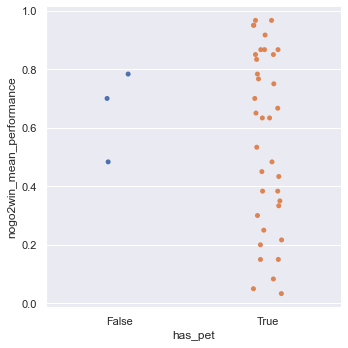

In [135]:
sns.catplot(x = 'has_pet', y = 'nogo2win_mean_performance', data = perf_questionnaire_data)

# Nogo 2 Win Performance Vs. Number of Pets

<AxesSubplot:xlabel='pet-number', ylabel='nogo2win_mean_performance'>

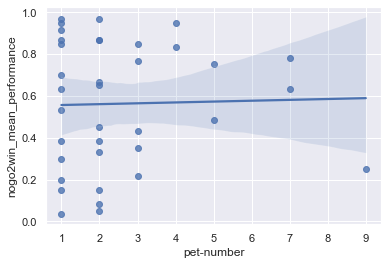

In [136]:
sns.regplot(data = perf_questionnaire_data, x = 'pet-number', y = 'nogo2win_mean_performance')

In [138]:
test_res = stats.pearsonr(perf_questionnaire_data.dropna(subset=['pet-number'])['pet-number'], perf_questionnaire_data.dropna(subset=['pet-number']).nogo2win_mean_performance)
print('correlation between eating disorder index and  ', test_res[0])
print('p-value: ', test_res[1])

correlation between eating disorder index and   0.02658494027433185
p-value:  0.8776828294964419


In [139]:
def clean_pet_type(pet_type):
    if all(x in pet_type for x in ['cat', 'dog']):
        return "both"
    elif('dog' in pet_type):
        return "dog"
    elif('cat' in pet_type):
        return "cat"
    else:
        return ""


In [140]:
perf_questionnaire_data_has_pet = perf_questionnaire_data.dropna(subset=['pet-type'])

In [141]:
perf_questionnaire_data_has_pet["pet-type"] = perf_questionnaire_data_has_pet["pet-type"].map(lambda x: clean_pet_type(x))

/var/folders/5p/j5wvkpqj2_n5r5h100pdscbr0000gn/T/ipykernel_35718/1936678068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perf_questionnaire_data_has_pet["pet-type"] = perf_questionnaire_data_has_pet["pet-type"].map(lambda x: clean_pet_type(x))


# Nogo 2 Win Performance Vs. pet type

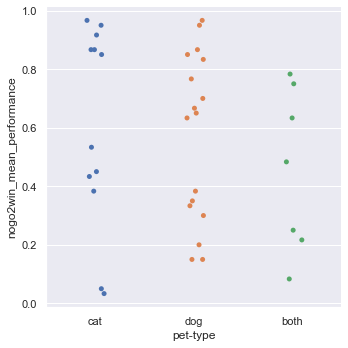

In [142]:
sns.catplot(x = 'pet-type', y = 'nogo2win_mean_performance', data = perf_questionnaire_data_has_pet)

# BMI vs Global score

<AxesSubplot:xlabel='BMI', ylabel='global_score'>

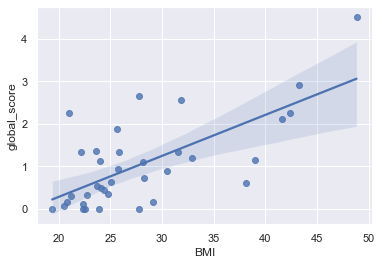

In [143]:
sns.regplot(data = perf_questionnaire_data_has_pet, y = 'global_score', x = 'BMI')

In [144]:
test_res = stats.pearsonr(perf_questionnaire_data['global_score'], perf_questionnaire_data['BMI'])
print('correlation between eating disorder index and  ', test_res[0])
print('p-value: ', test_res[1])

correlation between eating disorder index and   0.6115234035185763
p-value:  3.5365081899800524e-05
